In [0]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [0]:
import numpy as np

In [35]:
print("Training data shape: ", x_train.shape) # (60000, 28, 28) -- 60000 images, each 28x28 pixels
print("Test data shape", x_test.shape) # (10000, 28, 28) -- 10000 images, each 28x28

# Flatten the images
image_vector_size = 28*28
x_train = x_train.reshape(x_train.shape[0], image_vector_size)
x_test = x_test.reshape(x_test.shape[0], image_vector_size)

Training data shape:  (60000, 28, 28)
Test data shape (10000, 28, 28)


In [36]:
print("Training data shape: ", x_train.shape) # (60000, 28, 28) -- 60000 images, each 28x28 pixels
print("Test data shape", x_test.shape) # (10000, 28, 28) -- 10000 images, each 28x28

Training data shape:  (60000, 784)
Test data shape (10000, 784)


In [0]:
# Function to extract the classes
def extract_2classes(class0, class1, X, Y):
    # Select class #0
    X_0 = X[Y == class0]
    Y_0 = Y[Y == class0]
    # Select class #1
    X_1 = X[Y == class1]
    Y_1 = Y[Y == class1]
    # Join the two classes to make the set
    X_2classes = np.vstack((X_0, X_1))
    Y_2classes = np.append(Y_0, Y_1)
    return X_2classes, Y_2classes

In [0]:
X_train_2classes, Y_train_2classes = extract_2classes(5, 7, x_train, y_train)
X_test_2classes, Y_test_2classes = extract_2classes(5, 7,x_test, y_test)

In [39]:
print("Training data shape: ", X_train_2classes.shape) # (60000, 28, 28) -- 60000 images, each 28x28 pixels
print("Test data shape", X_test_2classes.shape) # (10000, 28, 28) -- 10000 images, each 28x28

Training data shape:  (11686, 784)
Test data shape (1920, 784)


In [0]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

def predict(train_features,test_features,train_labels): 
    clf = Perceptron(tol=1e-3, random_state=0)
    # Fitting the data into the model
    clf.fit(train_features, train_labels)
    # Predicting the labels for test data
    predicted_values = clf.predict(test_features)
    return predicted_values
    
def calc_accuracy(train_features,test_features,train_labels,test_labels):
    # Calling predict function to get the predicted labels of test data
    pred = predict(train_features,test_features,train_labels)
    return accuracy_score(pred, test_labels)
  

In [41]:
# kf = KFold(n_splits=4)
# kf.get_n_splits(X_train_2classes)
# print(kf.split(X_train_2classes))
# for train_index, test_index in kf.split(X_train_2classes):
#     print("TRAIN:", train_index, "TEST:", test_index)
#     X_train, X_test = X_train_2classes[train_index], X_train_2classes[test_index]
#     y_train, y_test = y[train_index], y[test_index]
calc_accuracy(X_train_2classes,X_test_2classes,Y_train_2classes,Y_test_2classes)

0.9895833333333334

In [0]:
xcombined = np.append(X_train_2classes,X_test_2classes,axis=0)
ycombined = np.append(Y_train_2classes,Y_test_2classes)
trainAccArr=[]
testAccArr=[]
kArray=[]

In [0]:
for i in range(4,11):
    kf = KFold(n_splits=i)
    kArray.append(i)
    tempTrain=0
    tempTest=0
    for train_index, test_index in kf.split(xcombined):
        X_train, X_test = xcombined[train_index], xcombined[test_index]
        Y_train, Y_test = ycombined[train_index], ycombined[test_index]
        tempTrain+=calc_accuracy(X_train,X_train,Y_train,Y_train)
        tempTest+=calc_accuracy(X_train,X_test,Y_train,Y_test)
    trainAccArr.append(tempTrain/i)
    testAccArr.append(tempTest/i)

In [44]:
print(trainAccArr)
print(testAccArr)

[0.9985545580591983, 0.9987321867703465, 0.9983242855552291, 0.9978073649532362, 0.9978160798366429, 0.9975286677886329, 0.9974030996663139]
[0.9854475747268717, 0.9881669254912063, 0.9872117182684258, 0.989416741325302, 0.9888283708545147, 0.9873587226885263, 0.9882407507455591]


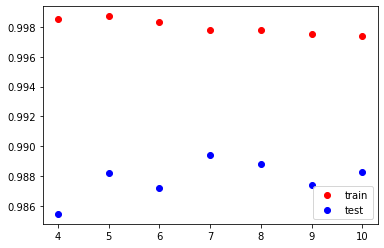

In [45]:
plt.scatter(x=kArray,y=trainAccArr,c="red", label = 'train')
plt.scatter(x=kArray,y=testAccArr,c="blue", label = 'test')
plt.legend()
plt.show()